**선형대수 (linear algebra) : 벡터, 벡터공간, 선형변환, 선형연립방정식을 다루는 대수학**
- 벡터 (vector)와 행렬 (matrix)을 이용한 벡터연산과 선형연립방정식 풀이
- 벡터와 행렬에 대한 일반적인 사항
- 선형연립방정식 풀이, 역행렬 계산, 고유값 계산 등

### (1) 자료 유형

**스칼라 (scalar) : 숫자 하나로 이루어진 자료**
- x와 같이 알파벳 소문자로 표기
- 실수 (real number)
- x ∈ R : 실수집합 R의 원소

**벡터 (vector) : 여러 개의 숫자로 이루어진 한 줄의 자료**
- 1차원 배열
- 그래프 상의 어떤 지점의 좌표를 나타낼 때, 가로축과 세로축의 값을 묶음
- 행 (row)과 열 (column)을 가짐
- 차원 (dimension) : 하나의 벡터를 이루는 자료의 수

In [1]:
# x = [1 2 3 4]T
import numpy as np
x1 = np.array([[1], [2], [3], [4]])
x1

array([[1],
       [2],
       [3],
       [4]])

In [2]:
# 1차원 배열 객체 벡터
x2 = np.array([1, 2, 3, 4])
x2

array([1, 2, 3, 4])

**행렬 (matrix) : 벡터 여러 개로 이루어진 자료 집합**
- 요소들을 직사각형으로 배열한 것
- 행렬의 크기는 행과 열의 수 (차원) 로 결정 (m x n)
- 정방행렬 (square matrix) : 행의 수와 열의 수가 같은 행렬
- 열벡터 (column vector) : 하나의 열로 배치된 수의 배열 (n x 1 차원의 행렬
- 행벡터 (row vector) : 하나의 행으로 배치된 수의 배열 (1 x n 차원의 행렬)

**ndarray 클래스**
- class numpy.ndarray(shape[, dtype=float, buffer=None, offset=0, strides=None, order=None])
    - shape : 배열의 형태를 나타내는 튜플 (n x m)


- numpy.array(object [, dtype=None, copy=True, order='K', subok='unsafe', ndmin=0]) -> out
    - python의 다른 객체를 이용해 행렬을 생성할 경우 사용

In [4]:
A = np.array([[11, 12, 13], [21, 22, 23]])
A

array([[11, 12, 13],
       [21, 22, 23]])

**zeros()**
- 행렬 요소가 전부 0인 행렬

**ones()**
- 행렬 요소가 전부 1인 행렬

**eye()**
- 항등행렬

### (2) 특수한 벡터와 행렬

#### 영벡터와 영행렬

- 영벡터 (zeros-vector) : 모든 원소가 0인 N차원 벡터
- 열행렬 (zeros-matrix) : 모든 원소가 0인 행렬
    - numpy.zeros(shape [, dtype=float, order='C']) -> arr

In [13]:
np.zeros([2, 3])

array([[0., 0., 0.],
       [0., 0., 0.]])

#### 일벡터와 일행렬

- 일벡터 (ones-vector) : 모든 원소가 1인 N차원 벡터
- 일행렬 (ones-matrix) : 모든 원소가 1인 행렬
    - numpy.ones(shape [, dtype=float, order='C']) -> arr

In [14]:
np.ones([2, 3])

array([[1., 1., 1.],
       [1., 1., 1.]])

#### 정방행렬
- 정방행렬 (square matrix) : 행의 개수와 열의 개수가 같은 행렬

#### 대각행렬
- 주대각 (main diagonal) 또는 대각 (diagonal) : 행과 열의 색인이 같은 위치
- 비대각 (off-diagonal) : 대각 위치에 있지 않은 것
- 대각행렬 (diagonal matrix) : 모든 비대각 요소가 0인 행렬
    - 대각행렬이 반드시 정방행렬일 필요는 없음
    - 비대각 성분이 0이기만 하면 된다

In [15]:
np.diag([1, 2, 4])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 4]])

#### 대칭 행렬
- 대칭행렬 (symmetric matrix) : 전치연산을 해서 얻은 전치행렬과 원행렬이 같은 행렬

#### 항등 행렬
- 항등행렬 (identity matrix) 또는 단위행렬 (unit matrix) : 대각 성분이 1이고 비대각 성분이 0인 행렬
- AI = IA = I
- numpy.eye(value [, dtype=float]) -> arr

In [16]:
I = np.eye(3)
I

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

#### 정부호행렬
- 정부호 (positive definite) : n x n 행렬 A가 0이 아닌 모든 x에 대해 xT A x > 0 인 경우
    - 어떤 행렬의 모든 소행렬식 (leading minors)의 행렬식이 양이면 그 행렬은 정부호
    - A의 소행렬식은 n차의 정방행렬

In [17]:
# 주어진 A 행렬에 대해 |A|를 계산하고 A가 정부호인지 판별
# A = [[1 2 3], [1 2 1], [0 1 2]]
# 첫 번째 행에 대한 행렬식의 Laplace 전개
## |A| = 1|2 1 1 2| - 2|1 1 0 2| + 3|1 2 0 1| = 1(3)-2(2)+3(1) = 2 > 0
## 소행렬식의 행렬식 A11 = 1 > 0이지만 |A11 A12 A21 A22| = |1 2 1 2| = 0이므로 정부호가 아니다

import numpy as np

def isPositiveDefinite(mat):
    row, col = mat.shape
    
    # 정방행렬이 아니면
    if (row != col):
        return False
    
    # 소행렬 작성
    for i in range(1, row+1):
        am = mat[:i, :i]
        if (np.linalg.det(am) <= 0.0):
            return False
        
    return True

if __name__ == '__main__':
    mat = np.array([[1.0, 2.0, 3.0], [1.0, 2.0, 1.0], [0.0, 1.0, 2.0]])
    
    if isPositiveDefinite(mat):
        print("정부호")
        
    else:
        print("정부호 아님")

정부호 아님


### (3) 벡터와 행렬 연산

#### 전치
- 전치 : 행렬의 행과 열을 서로 교환
- 행렬 A의 전치는 A^T로 표시
- 대칭 (symmetric) : n x n 행렬이 A^T = A일 경우
    - 대칭행렬의 상삼각 부분의 요소는 하삼각 부분에 반사된 형태

In [18]:
a = np.array([[11, 12, 13], [21, 22, 23], [31, 32, 33]])
at = a.T
at

array([[11, 21, 31],
       [12, 22, 32],
       [13, 23, 33]])

#### 덧셈

- Cij = Aij + Bij, (i = 1, 2, ..., m; j = 1, 2, ..., n)
- C의 요소는 A의 요소에 B의 요소를 더한 것
    - 이 덧셈은 오직 같은 차원의 행렬 사이에서만 정의
    - 단, numpy의 차원 확장 (broadcasting)을 이용하면 큰 차원의 행렬에 맞춰 작은 차원의 행렬을 차원 확장하여 계산

In [19]:
a = np.array([[11, 12, 13], [21, 22, 23], [31, 32, 33]])
b = np.array([[1, 2, 3], [4, 5, 6], [4, 8, 9]])
a + b

array([[12, 14, 16],
       [25, 27, 29],
       [35, 40, 42]])

#### 벡터의 곱셈

- 스칼라곱 (scalar product, dot product) 또는 내적 (inner product) 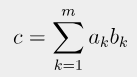
- c = aT b

In [21]:
import numpy as np

def innerVec(a, b):
    rowA = a.shape[0]
    rowB = b.shape[0]
    
    if (rowA != rowB):
        print("벡터 내적을 계산할 수 없음")
        return None
    
    c = 0.0
    for i in range(rowA):
        c += a[i] * b[i]
    return c

if __name__ == '__main__':
    a = np.array([1.1, 1.2, 1.3])
    b = np.array([2.1, 2.2, 2.3])
    
    c = innerVec(a, b)
    print("벡터의 내적 = ", c)

벡터의 내적 =  7.940000000000001


In [22]:
import numpy as np

a = np.array([1.1, 1.2, 1.3])
b = np.array([2.1, 2.2, 2.3])

c = np.dot(a, b)
print("벡터의 내적 = ", c)

벡터의 내적 =  7.940000000000001


In [23]:
# 벡터의 외적은 outer(a, b)
np.outer(a, b)

array([[2.31, 2.42, 2.53],
       [2.52, 2.64, 2.76],
       [2.73, 2.86, 2.99]])

#### 행렬의 곱셈

- l x m 행렬 A와 m x n 행렬 B의 행렬곱 (matrix product) C = AB는 아래와 같이 정의 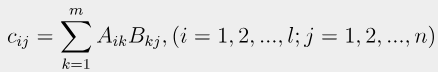
- A의 열 (차원 m)과 B의 행 수는 같아야 함
- 행렬곱은 벡터의 내적으로 정의

In [25]:
import numpy as np

def innerMat(A, B):
    rowA, colA = A.shape
    rowB, colB = B.shape
    
    if (colA != rowB):
        print("행렬곱을 계산할 수 없음")
        return None
    
    C = np.ndarray([rowA, colB])
    for i in range(rowA):
        for j in range(colB):
            C[i, j] = 0.0
            for k in range(colA):
                C[i, j] += A[i, k] * B[k, j]
                
    return C

if __name__ == '__main__':
    A = np.array([[1.1, 1.2, 1.3], [2.1, 2.2, 2.3]])
    B = np.array([[1.1, 1.2], [2.1, 2.2], [3.1, 3.2]])
    
    C = innerMat(A, B)
    print(C)

[[ 7.76  8.12]
 [14.06 14.72]]


In [26]:
import numpy as np

A = np.array([[1.1, 1.2, 1.3], [2.1, 2.2, 2.3]])
B = np.array([[1.1, 1.2], [2.1, 2.2], [3.1, 3.2]])

C = np.dot(A, B)
print(C)

[[ 7.76  8.12]
 [14.06 14.72]]


In [40]:
# 예제 2.4
A = np.array([[1, 2, 3], [1, 2, 1], [0, 1, 2]])
u = np.array([1, 6, -2])
v = np.array([8, 0, -3])

print(A.shape, u.shape, v.shape)

print(u + v)
print(np.dot(u, v))
print(np.dot(A, v))
print(np.dot(np.dot(u.T, A), v))

(3, 3) (3,) (3,)
[ 9  6 -5]
14
[-1  5 -6]
41


In [41]:
# 예제 2.5
A = np.array([[1, 2, 3], [1, 2, 1], [0, 1, 2]])
B = np.array([[-4, 1], [1, -4], [2, -2]])

np.dot(A, B)

array([[  4, -13],
       [  0,  -9],
       [  5,  -8]])

In [47]:
# 예제 2.6
A = np.array([[5, -2], [-3, 4]])
b = np.array([1, 3])

print(np.outer(A[0].T, b))
print(np.outer(A[1].T, b))
print(np.outer(A, b))

[[ 5 15]
 [-2 -6]]
[[-3 -9]
 [ 4 12]]
[[ 5 15]
 [-2 -6]
 [-3 -9]
 [ 4 12]]


### (4) 행렬의 속성

- 크기와 차수 (rank)
- **크기 : 어떤 행렬에 대해 하나의 실수를 대응**
    - 노옴 (norm), 대각합 (trace), 행렬식 (determinant)

#### 행렬노옴

**행렬노옴 또는 유클리드노옴 (Euclidian norm) : 행렬 A에 대해 다음 식으로 정의되는 숫자** 
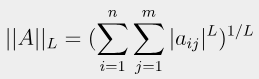

- ||A||L 로 표기
- L = 1이면 L1-노옴, L = 2이면 L2-노옴

L2-노옴은 프로베니우스노옴 (Frobenius norm) 이라고도 부르며, ||A||F라고 표기 
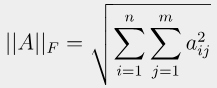

- 노옴은 항상 0보다 크거나 같음

노옴은 모든 크기의 행렬에 대해 정의할 수 있으므로 벡터에 대해서도 정의할 수 있음
- 벡터의 노옴의 제곱은 벡터의 제곱합과 같음
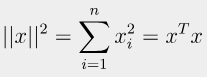
- 노옴은 항상 0보다 크므로, 노옴의 제곱이 가장 작을 때 노옴도 가장 작아짐

In [49]:
A = np.array([[1, 2, 3], [4, 5, 6], [4, 8, 9]])
np.linalg.norm(A)

15.874507866387544

#### 대각합
**대각합(trace) : 정방행렬에 대해서만 정의. 대각원소의 합으로 계산**
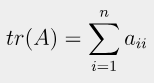

- 스칼라를 곱한 행렬의 대각합은 스칼라와 원행렬 대각합의 곱
    - tr(**s**A) = **s**tr(A)

- 전치연산을 해도 대각합은 달라지지 않음
    - tr(A^T) = tr(A)

- 두 행렬의 합의 대각합은 두 행렬의 대각합의 합
    - tr(A + B) = tr(A) + tr(B)

- 두 행렬의 곱의 대각합은 순서를 바꾸어도 달라지지 않음
    - tr(AB) = tr(BA)

In [50]:
A = np.array([[1, 2, 3], [4, 5, 6], [4, 8, 9]])
np.trace(A)

15

#### 행렬식

**정방행렬 A의 행렬식 (determinant)은 |A| 또는 det(A), detA로 표기되는 스칼라값**
- det(A) = |a11 a12 a21 a22| = a11a22 - a12a21
- det(A) = |A| = a11|a22 a23 a32 a33| - a12|a21 a23 a31 a33| + a13|a21 a22 a31 a32| = a11(a22a33 - a23a32) - a12(a21a33 - a23a31) + a13(a21a32 - a22a31)

n x n 행렬의 행렬식은 (n - 1) x (n - 1) 행렬의 행렬식의 항을 이용하여 표현할 수 있음
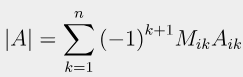

- **Mik : A의 i행과 k열을 삭제하고 얻은 (n - 1) x (n - 1) 행렬의 행렬식 = 소행렬식(minor)**
- **Cik : 소행렬식에 (-1)^(k+1)을 곱함 = 여인자 (cofactor)**
- **수반행렬 (adjoint matrix) : 여인자의 전치행렬 C^T. adj(A)로 표기**
- **Laplace 전개 (Laplace's development)**
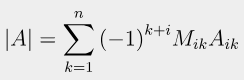

- **특이행렬 (singular matrix) : |A| = 0일 경우**
    - 역행렬 (inverse matrix)이 존재하기 위해서는 행렬 A가 비특이행렬 (non-singular matrix)여야 한다 (|A| != 0)

In [51]:
a = np.array([[1.0, 2.0], [3.0, 4.0]])
np.linalg.det(a)

-2.0000000000000004

In [52]:
b = np.array([[1.0, 2.0, 3.0], [2.0, 4.0, 1.0], [3.0, 2.0, 1.0]])
np.linalg.det(b)

-20.000000000000007

- 전치행렬의 행렬식은 원행렬의 행렬식과 같음
    - det(A^T) = det(A)

- 항등행렬의 행렬식은 1
    - det(I) = 1

- 두 행렬의 곱의 행렬식은 각 행렬의 행렬식의 곱
    - det(AB) = det(A)det(B)

- 역행렬의 행렬식은 원행렬의 행렬식의 역수와 같음
    - det(A^-1) = 1 / det(A)

### (5) 유용한 정리들

- (AB)T = BT AT
- (AB)^-1 = B^-1 A^-1
- |AT| = |A|
- |AB| = |A||B|
- B = BT일 때 C = AT B A이면, C = CT